In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
Ocean = pd.get_dummies(df['ocean_proximity'])
Ocean.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

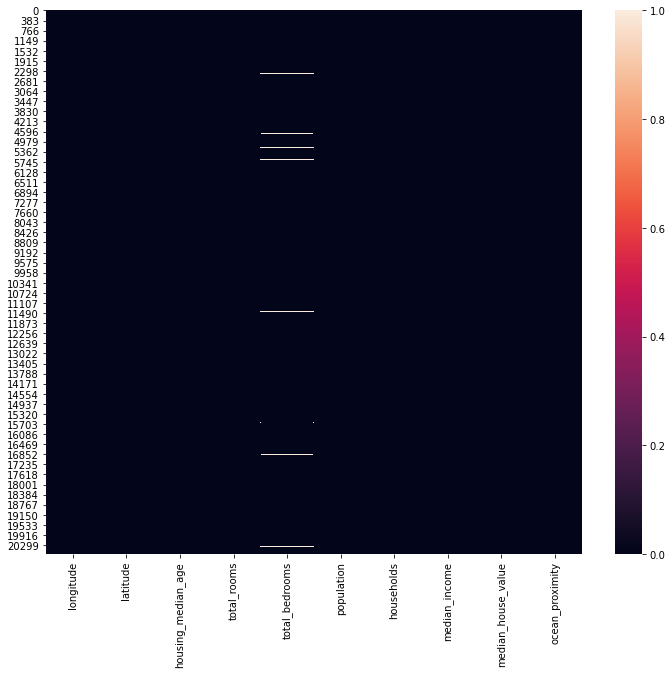

In [9]:
plt.figure(figsize = (12,10))
sns.heatmap(df.isna(), vmin=0, vmax=1)

In [10]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
df[df['total_bedrooms'].isna()==True]['ocean_proximity'].value_counts()

<1H OCEAN     102
INLAND         55
NEAR OCEAN     30
NEAR BAY       20
Name: ocean_proximity, dtype: int64

In [12]:
df['total_bedrooms'].groupby(by=df['ocean_proximity']).mean()

ocean_proximity
<1H OCEAN     546.539185
INLAND        533.881619
ISLAND        420.400000
NEAR BAY      514.182819
NEAR OCEAN    538.615677
Name: total_bedrooms, dtype: float64

In [13]:
def bedrooms_NaN(cols):
    bedrooms = cols[0]
    ocean = cols[1]
    if pd.isnull(bedrooms):
        
        if ocean == '<1H OCEAN': return 547
        elif ocean == 'INLAND': return 534
        elif ocean == 'NEAR OCEAN': return 539
        elif ocean == 'NEAR BAY': return 514
    
    else:
        return bedrooms
        

In [14]:
df['total_bedrooms'] = df[['total_bedrooms','ocean_proximity']].apply(bedrooms_NaN, axis=1)

In [15]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
df['income_cat'] = pd.cut(df['median_income'],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                     labels=[1, 2, 3, 4, 5])

In [18]:
df["rooms_per_household"] = round(df["total_rooms"]/df["households"])
df["bedrooms_per_room"] = round(df["total_bedrooms"]/df["households"])

In [19]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,7.0,1.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.0,1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.0,1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,6.0,1.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.0,1.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3,5.0,1.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3,5.0,1.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3,5.0,1.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2,4.0,1.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3,5.0,1.0


In [20]:
housing = df.drop(["total_rooms","total_bedrooms", "median_income","median_house_value", "ocean_proximity"], axis=1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = pd.concat([housing.drop("bedrooms_per_room", axis=1), Ocean], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
regressor = RandomForestRegressor(max_depth=35)

In [25]:
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=35)

In [26]:
pred = regressor.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
# 2821297364.272118
# 2797988506.3292227
# 4909263981.08927
# 2366868546.882433
# 2330310502.9745564
# 2305926872.8737144
# 2302226955.022453
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

2324658186.249143
0.8226005602182476


In [31]:
print(np.sqrt(mean_squared_error(y_test, pred)))

48214.7092311998


In [32]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [33]:
lreg = LinearRegression()

In [34]:
lreg.fit(X_train, y_train)

LinearRegression()

In [35]:
print(mean_squared_error(y_test, lreg.predict(X_test)))

5514781286.352078


In [36]:
sgd = SGDRegressor()

In [37]:
sgd.fit(X_train,y_train)

SGDRegressor()

In [38]:
# 2.671784734730215e+28
print(mean_squared_error(y_test, sgd.predict(X_test)))

7.445581497300633e+28


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ssc = StandardScaler()

In [41]:
ssc.fit(X_train)

StandardScaler()

In [42]:
X_train = ssc.transform(X_train)
X_test = ssc.transform(X_test)

In [43]:
from sklearn.pipeline import make_pipeline

In [44]:
est = make_pipeline(StandardScaler(),
...                     SGDRegressor(max_iter=1000, tol=1e-3))

In [45]:
est.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [46]:
print(mean_squared_error(y_test, est.predict(X_test)))

3.483057842980456e+20


In [63]:
est_ = make_pipeline(StandardScaler(),
...                     RandomForestRegressor(max_depth=35))

In [68]:
est_.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=35))])

In [69]:
print(mean_squared_error(y_test, est_.predict(X_test)))

2313053730.8534684


In [85]:
print(2302226955.022453<2282738773.318086)

False


In [67]:
print(np.sqrt(mean_squared_error(y_test, est_.predict(X_test))))

48117.96422331222


In [70]:
from sklearn.model_selection import StratifiedShuffleSplit

In [79]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
A = pd.concat([housing.drop("bedrooms_per_room", axis=1), Ocean, df['median_house_value']], axis=1)
for train_index, test_index in split.split(A, df["income_cat"]):
    strat_train_set = A.iloc[train_index]
    strat_test_set = A.iloc[test_index]

In [80]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

C:\Users\91836\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [81]:
strat_train_set.head()

,longitude,latitude,housing_median_age,population,households,rooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4586,-118.26,34.06,33.0,3707.0,1012.0,2.0,1,0,0,0,0,110000.0
1046,-120.72,38.38,9.0,806.0,306.0,6.0,0,1,0,0,0,157200.0
4358,-118.37,34.08,52.0,1258.0,650.0,5.0,1,0,0,0,0,374100.0
4954,-118.31,34.02,46.0,1227.0,448.0,5.0,1,0,0,0,0,108800.0
18816,-120.23,39.56,14.0,734.0,287.0,6.0,0,1,0,0,0,93000.0


In [82]:
est_.fit(strat_train_set.drop('median_house_value', axis=1), strat_train_set['median_house_value'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=35))])

In [84]:
print(mean_squared_error(strat_test_set['median_house_value'], est_.predict(strat_test_set.drop('median_house_value', axis=1))))

2282738773.318086


In [86]:
print(np.sqrt(mean_squared_error(strat_test_set['median_house_value'], est_.predict(strat_test_set.drop('median_house_value', axis=1)))))

47778.01558581191
